In [1]:
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # statistical plotting functions
sns.color_palette("viridis", as_cmap=True)
import pandas as pd # dataframes like in R
from copy import deepcopy
import numpy as np
from scipy import stats
import pprint
pp = pprint.PrettyPrinter(indent=2)
import os

current_dir = os.path.dirname(os.path.abspath(''))
project_directory = os.path.dirname(current_dir)

In [2]:
from mempyDEB.DEBODE.simulators import * # functions to run models
from mempyDEB.DEBODE.defaultparams import * # some default parameter configurations

In [33]:
# automatische aktualisierung externer Python-Dateien
%load_ext IPython.extensions.autoreload
%autoreload 2 

# Einbindung zusätzlicher Funktionen 
from utils import * 
from ModelFitting import *

The IPython.extensions.autoreload extension is already loaded. To reload it, use:
  %reload_ext IPython.extensions.autoreload


c:\Users\hanna\projects\mempyDEB\Ex03_TKTDFitting_Folsomia.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,0].legend()
c:\Users\hanna\projects\mempyDEB\Ex03_TKTDFitting_Folsomia.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  [a.legend().remove() for a in np.ravel(ax)[1:]]


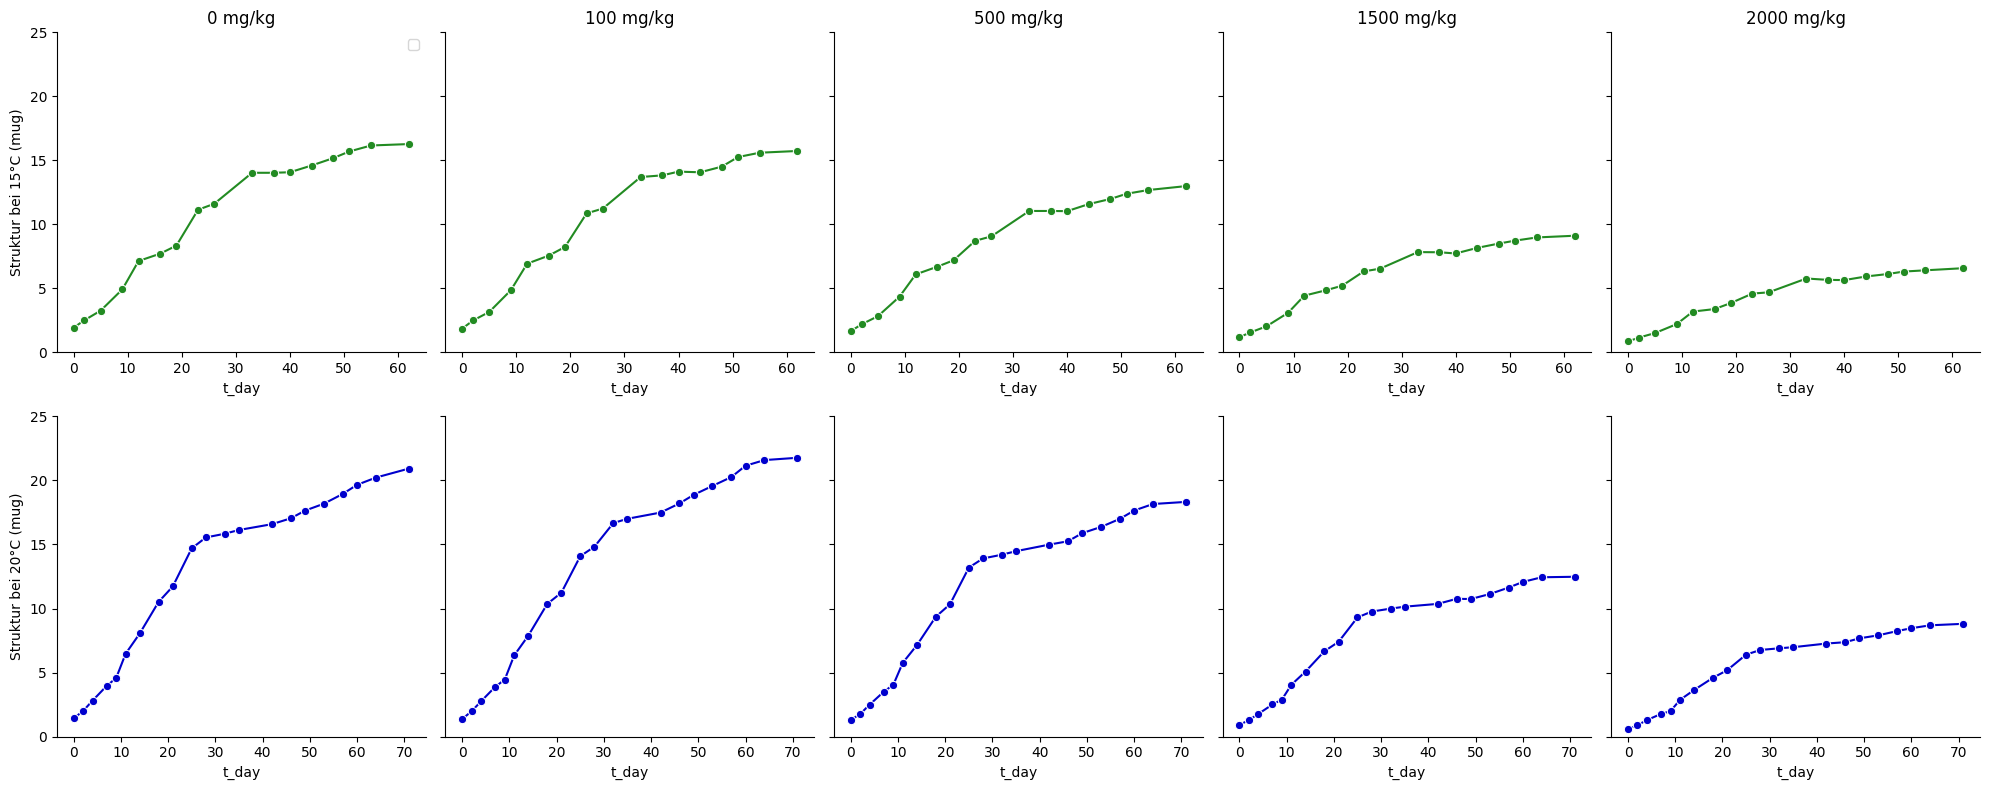

In [34]:
from Ex03_TKTDFitting_Folsomia import *

data = load_data()
_ = plot_data(data)

c:\Users\hanna\projects\mempyDEB\Ex03_TKTDFitting_Folsomia.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,0].legend()
c:\Users\hanna\projects\mempyDEB\Ex03_TKTDFitting_Folsomia.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  [a.legend().remove() for a in np.ravel(ax)[1:]]
c:\Users\hanna\projects\mempyDEB\Ex03_TKTDFitting_Folsomia.py:75: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,0].legend()
c:\Users\hanna\projects\mempyDEB\Ex03_TKTDFitting_Folsomia.py:76: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legen

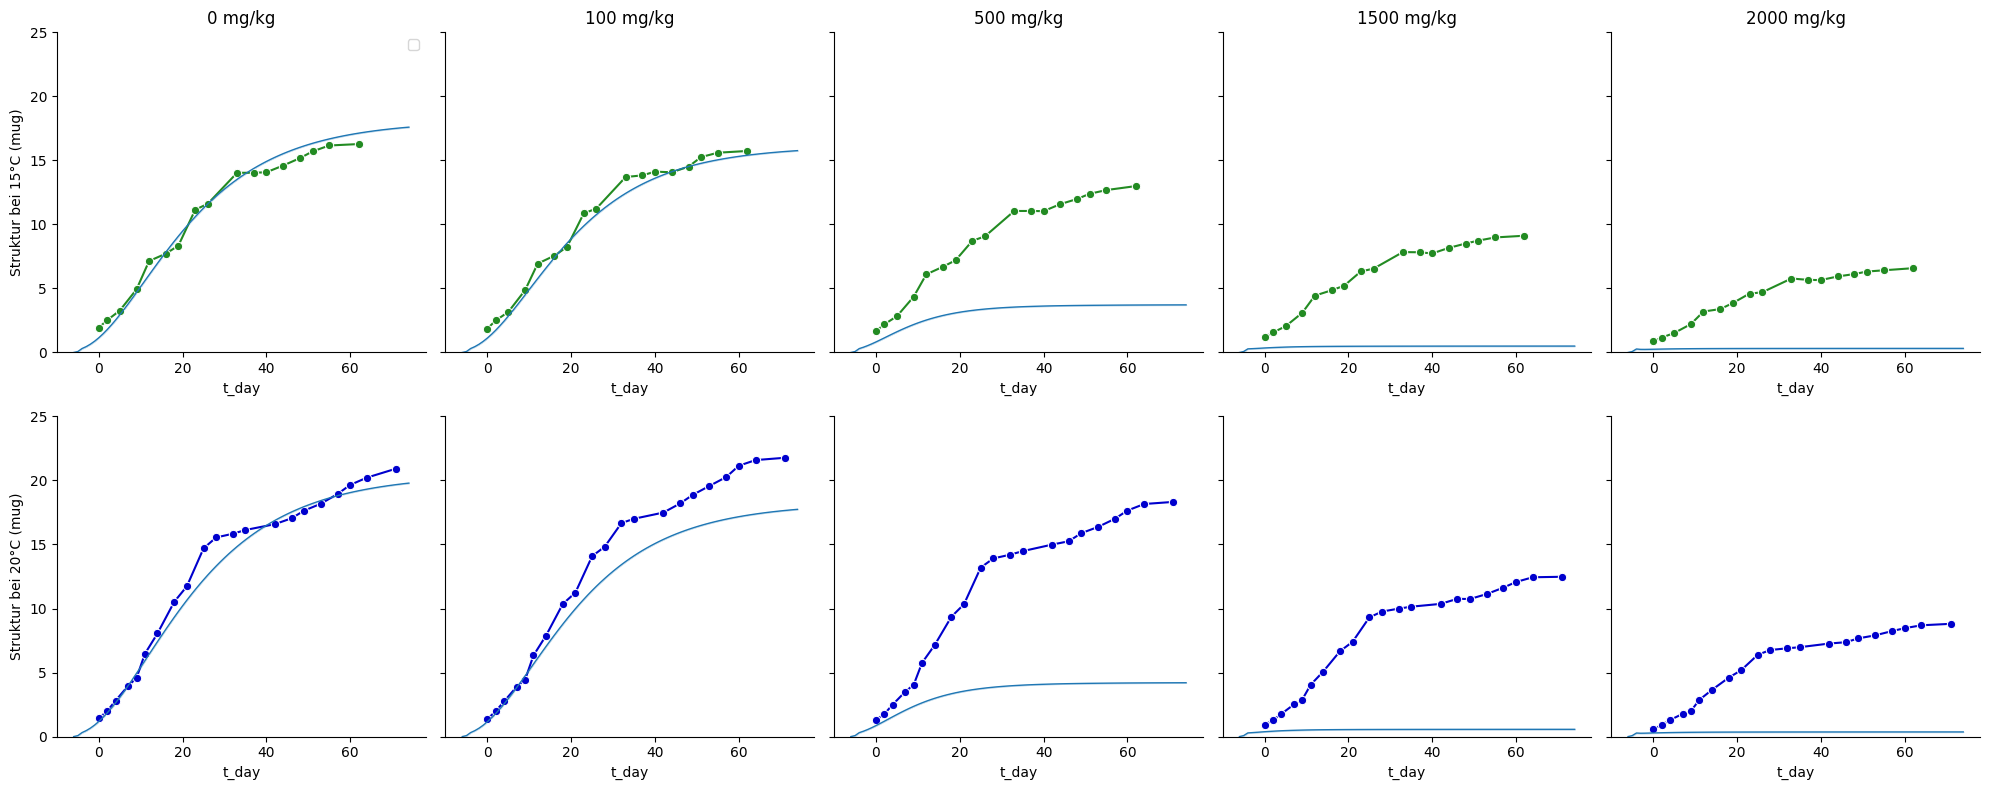

In [78]:
f = setup_modelfit('M')

sim_intguess = f.simulator(f.intguess)
fig, ax = plot_data(f.data)
ax = plot_sim(ax, sim_intguess)

Fitted model using Nelder-Mead method. Results stored in `optimization_result`
Estimated parameter values: {'kD_j': np.float64(1.0), 'ED50_j': np.float64(3040.1002199262807), 'beta_j': np.float64(1.6991583937792876)}


c:\Users\hanna\projects\mempyDEB\Ex03_TKTDFitting_Folsomia.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,0].legend()
c:\Users\hanna\projects\mempyDEB\Ex03_TKTDFitting_Folsomia.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  [a.legend().remove() for a in np.ravel(ax)[1:]]
c:\Users\hanna\projects\mempyDEB\Ex03_TKTDFitting_Folsomia.py:75: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,0].legend()
c:\Users\hanna\projects\mempyDEB\Ex03_TKTDFitting_Folsomia.py:76: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legen

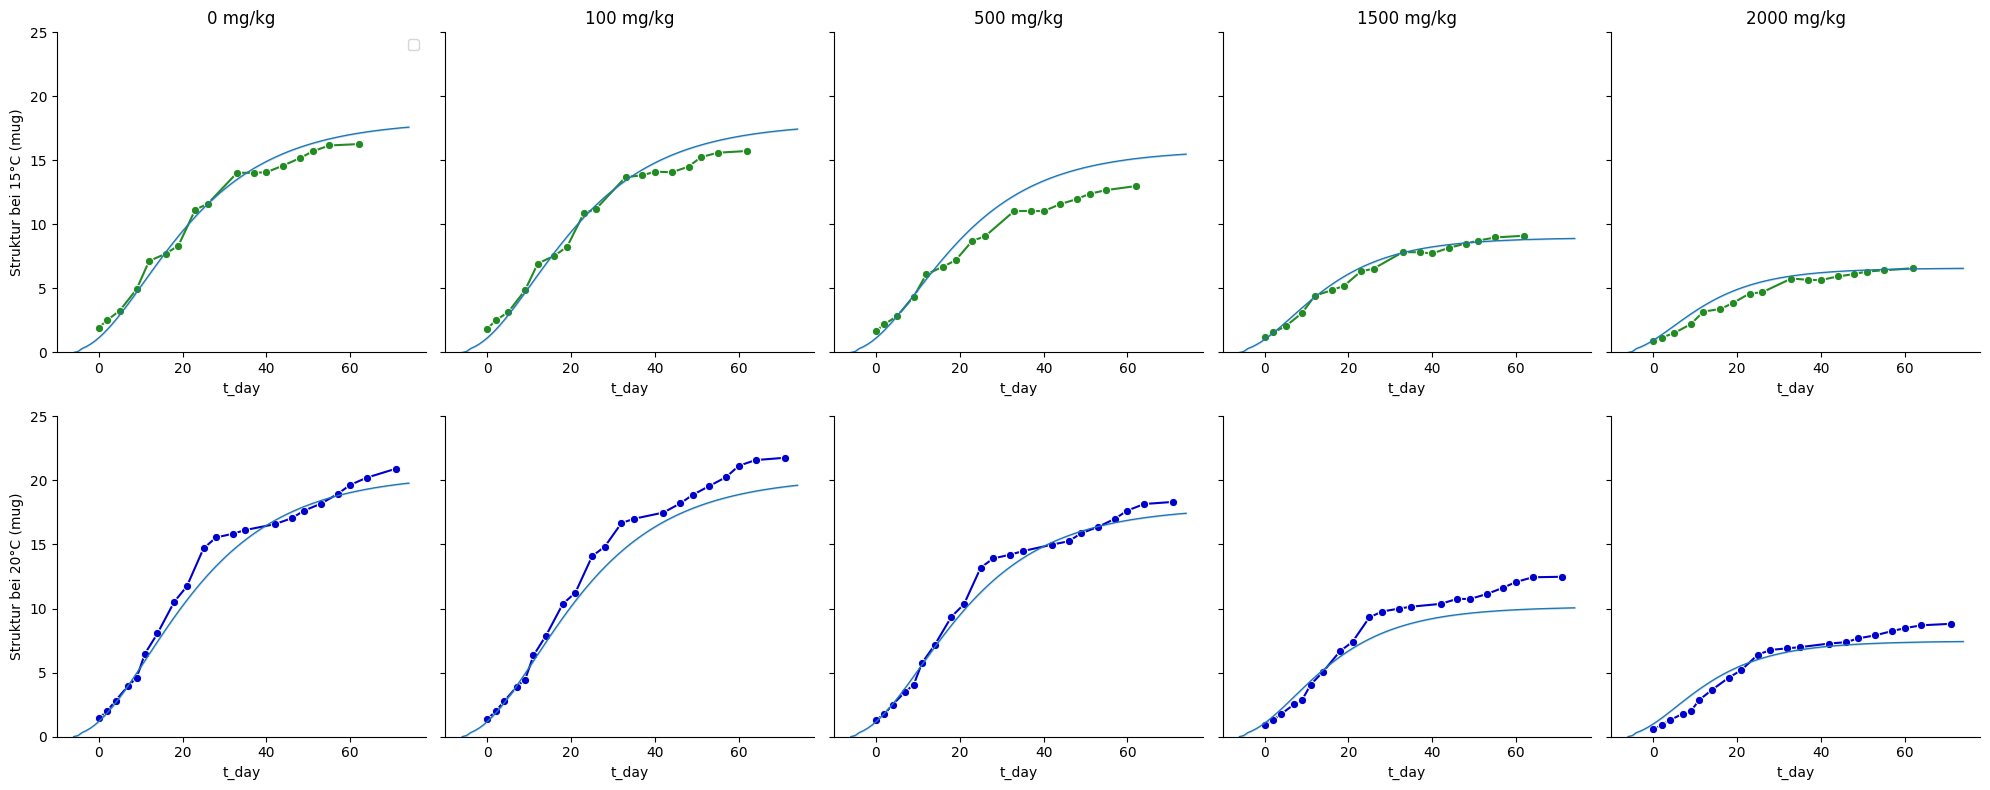

In [74]:
#f = setup_modelfit('M')
f.run_optimization(
    bounds =[(0,1),(1000,10_000),(1,10)], 
    options={'maxiter' : 100}
)

print(f"Estimated parameter values: {f.p_opt}")
p = deepcopy(f.defaultparams)
p.spc.update(f.p_opt)  
sim_opt = f.simulator(p.spc)

fig, ax = plot_data(f.data)
ax = plot_sim(ax, sim_opt)

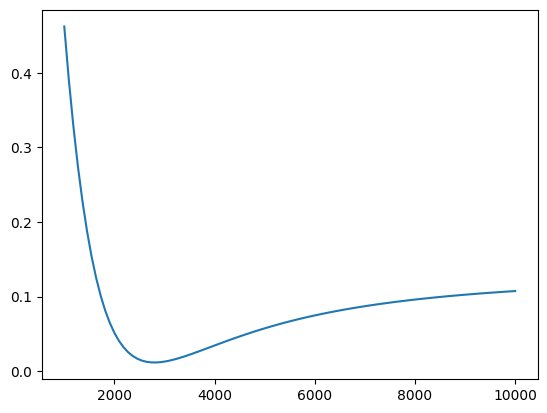

In [77]:
#testen, ob fitmodel Minima finden kann
p = { 
    'kD_j' : 1.,
    'ED50_j' : 5000,
    'beta_j' : 2.
    }

liste = []
x = np.linspace(1000,10000,100)
for ed in x:
    p['ED50_j'] = ed
    res = f.simulator(p)
    liste.append(f.loss(res,f.data))

fig,ax = plt.subplots()
ax.plot(x,liste)


# Bayesian statistics

In [6]:
d = setup_modelfit("M")
d.define_lognorm_prior(sigma=0.5)
d.prior_predictive_check()

(<Figure size 1200x600 with 3 Axes>,
 array([<Axes: xlabel='kD_j', ylabel='Prior density'>,
        <Axes: xlabel='ED50_j'>, <Axes: xlabel='beta_j'>], dtype=object))

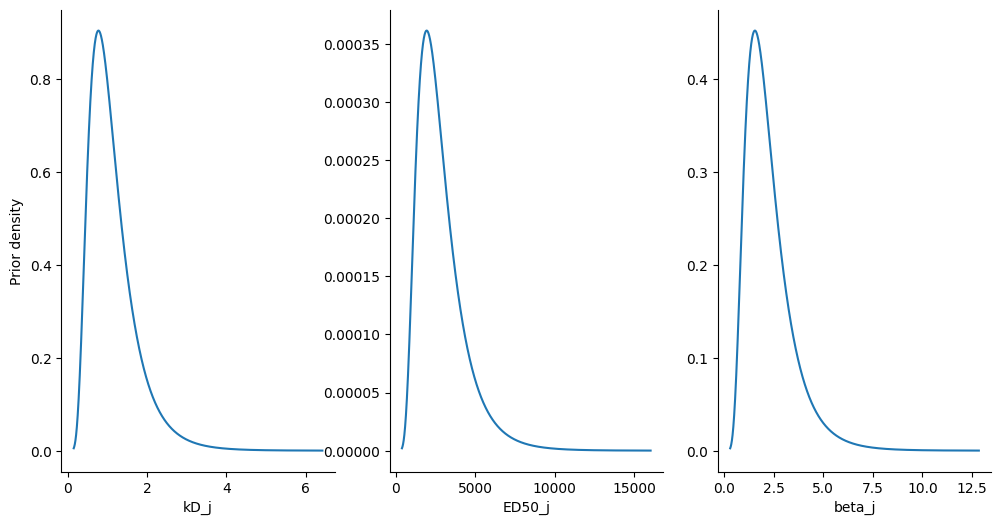

In [7]:
d.plot_priors()

In [8]:
d.run_bayesian_inference(
    popsize = 50,
    max_total_nr_simulations=100
)

c:\Users\hanna\anaconda3\envs\mempyfolsomia\Lib\site-packages\pyabc\storage\bytes_storage.py:37: UserWarning: Can't find pyarrow, falling back to less efficient csv to store pandas DataFrames.
Install e.g. via `pip install pyabc[pyarrow]`
  return df_to_bytes(object_)
ABC.History INFO: Start <ABCSMC id=1, start_time=2025-03-06 09:45:31>
ABC INFO: Calibration sample t = -1.
ABC INFO: t: 0, eps: 4.22884021e-02.
c:\Users\hanna\anaconda3\envs\mempyfolsomia\Lib\site-packages\pyabc\storage\bytes_storage.py:37: UserWarning: Can't find pyarrow, falling back to less efficient csv to store pandas DataFrames.
Install e.g. via `pip install pyabc[pyarrow]`
  return df_to_bytes(object_)
ABC INFO: Accepted: 50 / 115 = 4.3478e-01, ESS: 5.0000e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:01:34.271245, end_time=2025-03-06 09:47:05>


Conducted Bayesian inference using SMC-ABC. Results are in `abc_history` and `accepted`


In [10]:
d.posterior_sample()

{'kD_j': 0.9083131699004164,
 'ED50_j': 3525.5083200161203,
 'beta_j': 1.7581279924543567}

In [11]:
d.retrodict()
d.retrodictions

[      t_day   C_W  level_2         S    R         X_emb            X  \
 0        -6     0        0  0.000010  0.0  1.032327e+00   100.000000   
 1        -6     0        1  0.000010  0.0  1.032327e+00   100.000000   
 2        -6     0      810  0.000010  0.0  1.032327e+00   100.000000   
 3        -6     0      811  0.000010  0.0  1.032327e+00   100.000000   
 4        -6   100      162  0.000010  0.0  1.032327e+00   100.000000   
 ...     ...   ...      ...       ...  ...           ...          ...   
 1615     74  1500     1457  8.786660  0.0 -2.269456e-09  7483.842511   
 1616     74  2000      808  6.174009  0.0 -6.454959e-10  7567.779825   
 1617     74  2000      809  6.174009  0.0 -6.454959e-10  7567.779825   
 1618     74  2000     1618  6.975957  0.0 -5.513120e-09  7540.270621   
 1619     74  2000     1619  6.975957  0.0 -5.513120e-09  7540.270621   
 
               D_j  T_cels      S_ref      R_ref  X_emb_ref        X_ref  \
 0        0.000000    15.0   0.000010   0.0000

In [12]:
sol = d.retrodictions

In [63]:
#Optimization speichern, um nachher mit bayesian zu plotten
f.run_optimization(
    bounds =[(0,1),(1000,10_000),(1,10)], 
    options={'maxiter' : 100}
)

print(f"Estimated parameter values: {f.p_opt}")
p = deepcopy(f.defaultparams)
p.spc.update(f.p_opt)  
sim_optimize = f.simulator(p.spc)

Fitted model using Nelder-Mead method. Results stored in `optimization_result`
Estimated parameter values: {'kD_j': np.float64(1.0), 'ED50_j': np.float64(3040.1002199262807), 'beta_j': np.float64(1.6991583937792876)}


In [35]:
sol_b = bayesian(sol)

c:\Users\hanna\projects\mempyDEB\Ex03_TKTDFitting_Folsomia.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,0].legend()
c:\Users\hanna\projects\mempyDEB\Ex03_TKTDFitting_Folsomia.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  [a.legend().remove() for a in np.ravel(ax)[1:]]


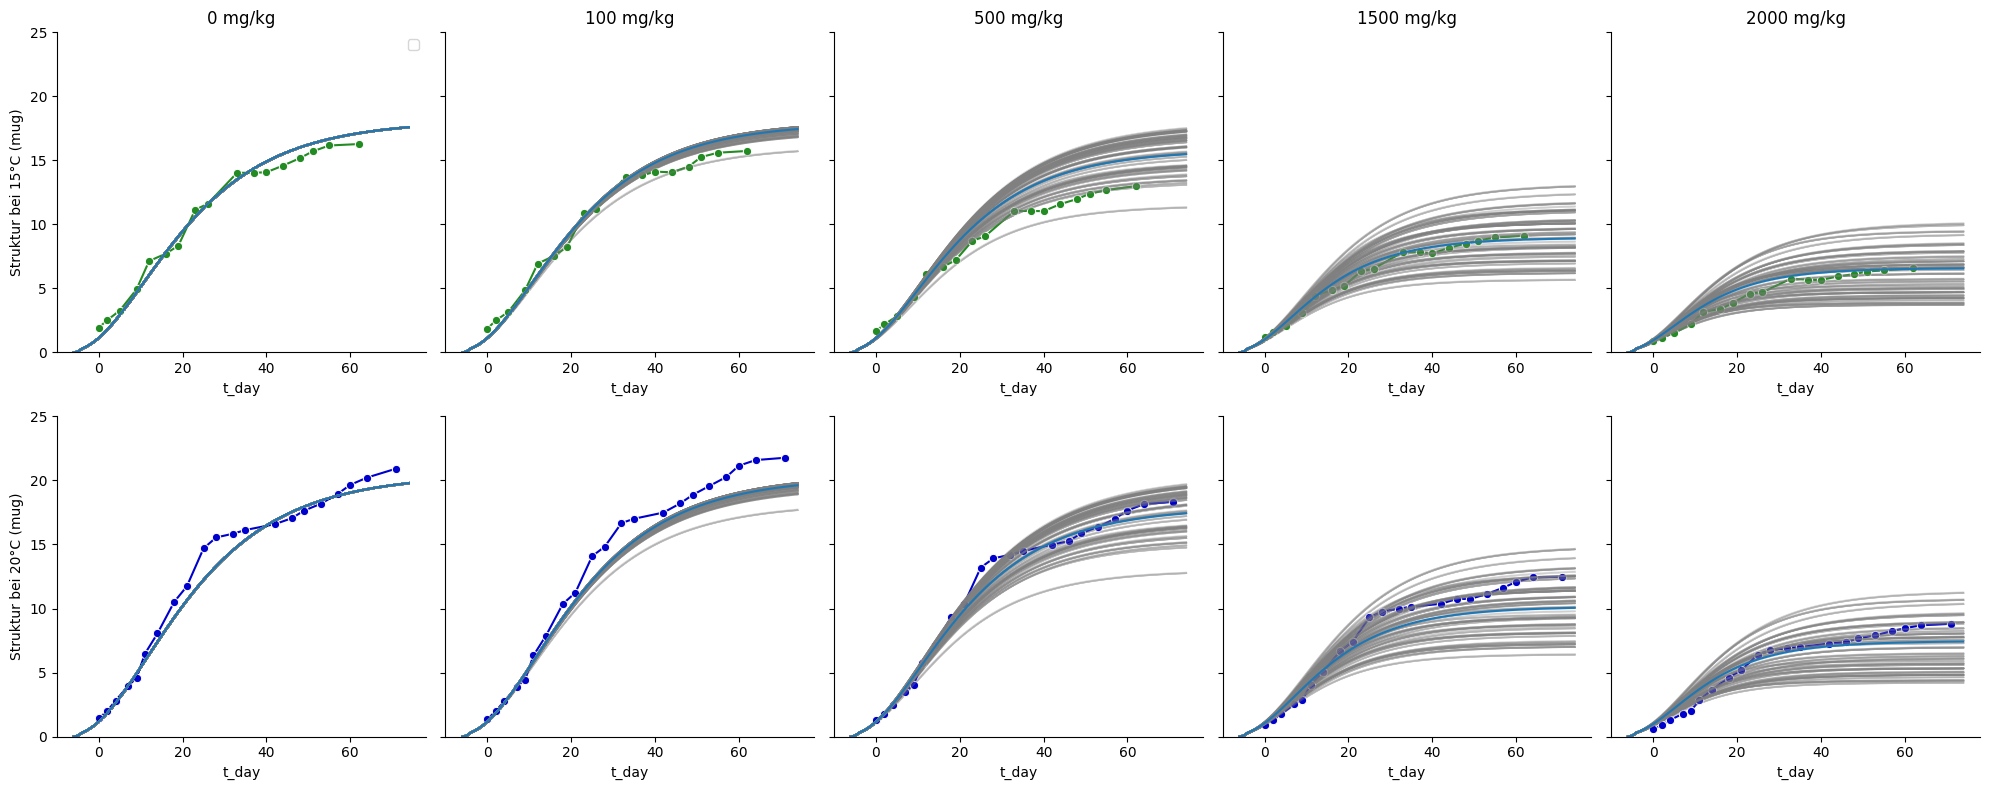

In [41]:
fig, ax = plot_data(f.data)
ax = plot_bayesian(ax, sol_b)
ax = plot_sim(ax, sim_optimize)

In [47]:
#Sicherheitskopie
fig_neu, ax_neu = fig, ax

In [79]:
point = d.extract_point_estimate()
point

{'kD_j': np.float64(2.0),
 'ED50_j': np.float64(2672.8133293284445),
 'beta_j': np.float64(2.4957293765482556)}

In [80]:
sim_point = f.simulator(point)

c:\Users\hanna\projects\mempyDEB\Ex03_TKTDFitting_Folsomia.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,0].legend()
c:\Users\hanna\projects\mempyDEB\Ex03_TKTDFitting_Folsomia.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  [a.legend().remove() for a in np.ravel(ax)[1:]]


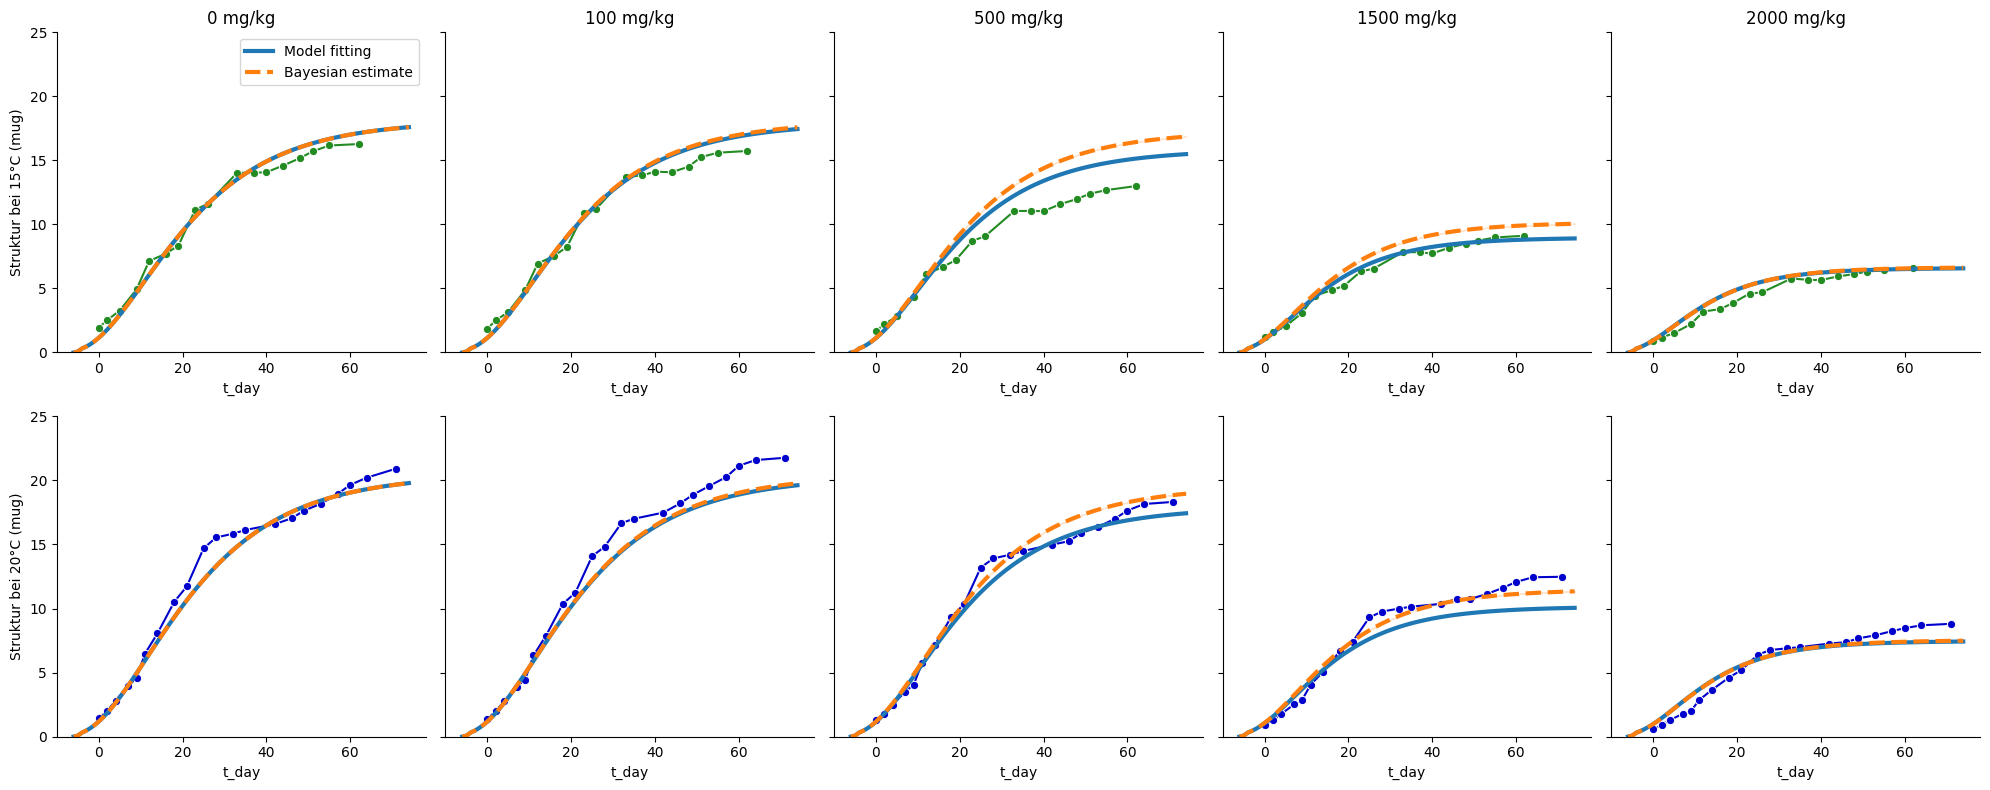

In [81]:
fig1, ax1 = plot_data(f.data)
ax1 = plot_sim(ax1, sim_optimize,3, label='Model fitting')
ax1 = plot_sim(ax1, sim_point,3, linestyle='--', label='Bayesian estimate')